# Softmax回归

```{note}
本节用最简单的softmax回归（实际上就是单层神经网络）来实现图像分类，主要目的是为了跑通流程
```

## 定义模型

![jupyter](../images/a/softmax.svg)

In [1]:
import torch
from torch import nn


def init_weights(m):
    """initialize at random"""
    if type(m) == nn.Linear:
        # 赋值操作都带_
        nn.init.normal_(m.weight, std=0.01)
        

# softmax模型
# fashion-mnist数据集每个样本的shape为(1, 28, 28)，所以需要先Flatten到1*28*28=784维
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
# 循环各层调用init_weights
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

## 训练

In [2]:
import d2l

# 1.获取数据
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

loss 0.403, train acc 0.860083, test acc  0.837400


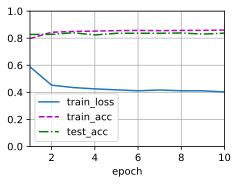

In [3]:
# 2.训练，用上一节定义好的函数进行训练果然很方便~
lr, num_epochs = 0.01, 10
d2l.train_image_classifier(net, train_iter, test_iter, lr, num_epochs)